In [6]:
using PyPlot, Jets, JetPack, JetPackDSP

## Read in model from binary

In [16]:
nz,nx = 176,851
v = read!("marmousi_vp_20m_176x851.bin", Array{Float32}(undef, nz,nx));

## Smooth model using JetPackDSP convolutional smoother

In [4]:
?JetPackDSP.JopConvolve

```
A = JopConvolve(dom, rng, h [, optional parameters])
```

`A` is an n-dimension convolution (using the filter `h::Array`) operator with domain `dom::JetSpace` and range `rng::JetSpace`, and with the following optional named arguments:

  * `x0` is a tuple defining the origin of the upper-left corner of `h`
  * `dx` is a tuple defining the spacing along each dimension of `h`

# Examples

## 1D, causal

```julia
A = JopConvolve(JetSpace(Float64,128), JetSpace(Float64,128), rand(32))
m = zeros(domain(A))
m[64] = 1.0
d = A*m
```

## 1D, zero-phase

```julia
A = JopConvolve(JetSpace(Float64,128), JetSpace(Float64,128), rand(32), dx=(1.0,), x0=(-16.0,))
m = zeros(domain(A))
m[64] = 1.0
d = A*m
```

## 2D, zero-phase

```julia
A = JopConvolve(JetSpace(Float64,128,128), JetSpace(Float64,128,128), rand(32,32), dx=(1.0,1.0), x0=(-16.0,-16.0))
m = zeros(domain(A))
m[64,64] = 1.0
d = A*m
```

# Notes

  * It is often the case that the domain and range of the convolution operator are the same.  For this use-case, we provide

a convenience method for construction the operator:

```
A = JopConvolve(spc, h [, optional parameters])
```

where `spc::JetSpace` and is used for both `dom` and `rng`.

  * Since smoothing is a common use-case for JopConvolve, we provide a convenience method for creating `A` specific

to n-dimensional smoothing:

```
A = JopConvolve(spc [, optional arguments])
```

where the optional arguments and their default values are:

  * `smoother=:gaussian` choose between `:gaussian`, `:triang` and `:rect`
  * `n=(128,)` choose the size of the smoothing window in each dimension.  If `length(n)=1`, then we assume a square window.
  * `sigma=(0.5,)` for a gaussian window choose the shape of the window.  If `length(sigma)=1`, then we assume the same shape in each dimension.

# 2D Smoothing Example

```julia
P = JopPad(JetSpace(Float64,256,256), -10:256+11, -10:256+11, extend=true)
S = JopConvolve(range(P), smoother=:rect, n=(1,1))
R = JopPad(JetSpace(Float64,256,256), -10:256+11, -10:256+11, extend=false)
m = rand(domain(P))
d = R'∘S∘P*m
```


In [31]:
a = 20
b = a+1
P = JopPad(JetSpace(Float64,nz,nx), -b:nz+b, -b:nx+b, extend=true)
S = JopConvolve(range(P), smoother=:rect, n=(a,a))
R = JopPad(JetSpace(Float64,nz,nx), -b:nz+b, -b:nx+b, extend=false)
slowness_sm = R'∘S∘P*(1 ./v)
vsm = 1 ./(slowness_sm);

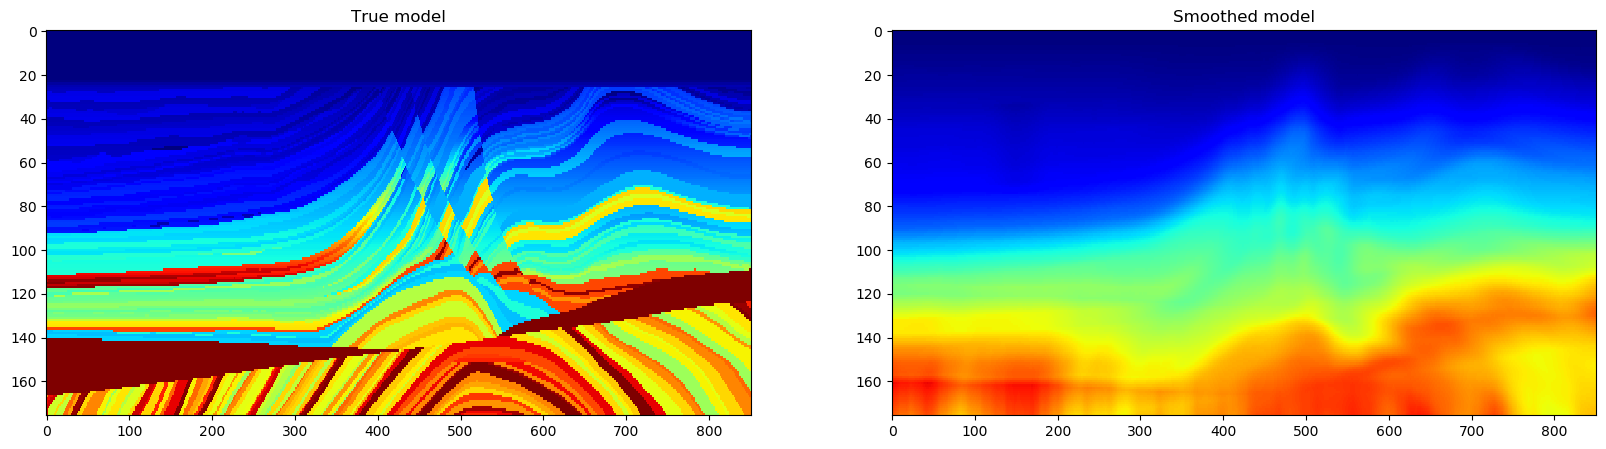

In [32]:
figure(figsize=(20,5))
subplot(121);imshow(v,cmap="jet",aspect="auto");clim(1500,4500);title("True model");
subplot(122);imshow(vsm,cmap="jet",aspect="auto");clim(1500,4500);title("Smoothed model");

## Next we find the water layer in the original model and paste it on the smoothed model

In [33]:
vsm[v.==1500.0].=1500.0;

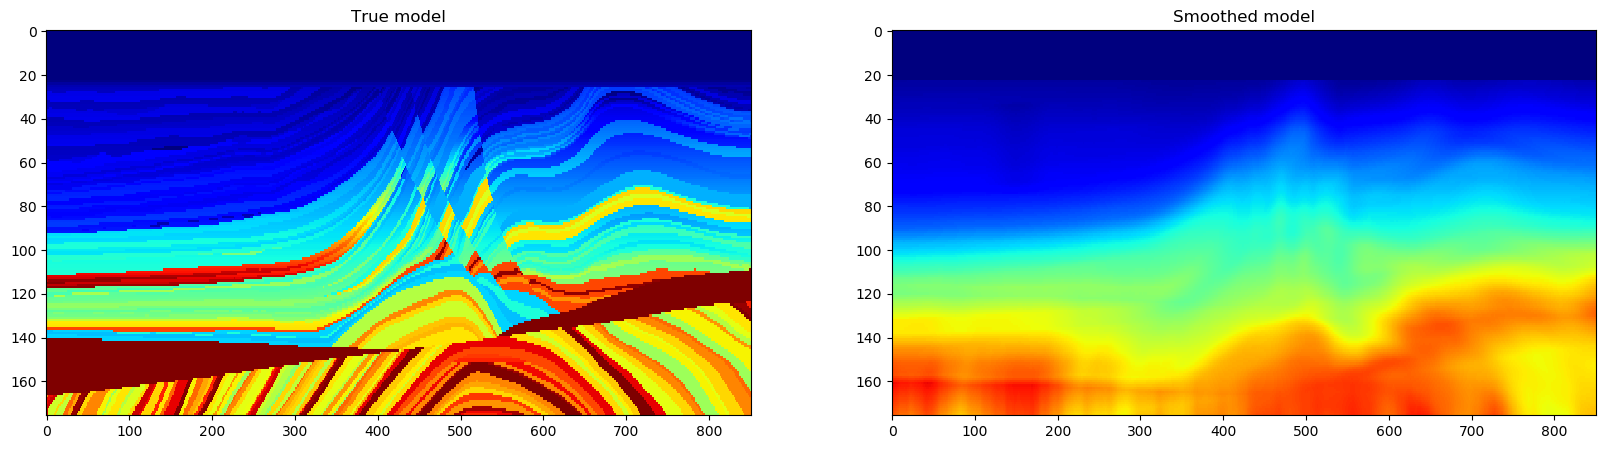

In [34]:
figure(figsize=(20,5))
subplot(121);imshow(v,cmap="jet",aspect="auto");clim(1500,4500);title("True model");
subplot(122);imshow(vsm,cmap="jet",aspect="auto");clim(1500,4500);title("Smoothed model");

## Write out the smoothed model for later

In [35]:
write("marmousi_vp_smooth_20m_176x851.bin",vsm)

1198208